# Holophenotype clustermap

> Fill in a module description here

In [ ]:
#| default_exp 04_Holophenotype_Dendrogram

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
# import svgutils
# from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
import esploco.plotTools
from esploco.plotTools import setFont
setFont('Inter', 6)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib
font_dirs = ["/Users/sangyuxu/Library/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
plt.rcParams['svg.fonttype'] = 'none'
import pickle
%run spiral_heatmap.ipynb
import dabest
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import esploco.plotTools as plotTools
plotTools.setFont('inter', 9)

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [ ]:

%matplotlib inline

paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure5/'
metapath = paperpath + 'DataforFigures/Behavior/Data/Figure5exptMeta.csv'
fullMetaData = pd.read_csv(metapath)
fullMetaData['Expt'] = fullMetaData['Expt'].str.replace('CsCh','Chr')
fullMetaData['Expt'] = fullMetaData['Expt'].str.replace(' hr',' h')
dataDict=dict()
stateDict = {'24':'Starved','48':'Starved', '0':'Fed'}
for i in range(len(fullMetaData)):
    data = pd.read_csv(picklepath + fullMetaData.iloc[i, 1]).sort_values(by = ['Status', 'Light'])
    data['Starvation'] = data['Starvation'].round().astype('str')
    dataDict[fullMetaData.iloc[i, 0] ]= data
    if i ==0:
        fullMetaData.iloc[i, -1] = len(data.loc[data['Status']=='Ctrl'])
        fullMetaData.iloc[i, -3] = 'var'
        fullMetaData.iloc[i, -2] = 'var'

    else:
        fullMetaData.iloc[i, -3] = data['Starvation'][0]
        fullMetaData.iloc[i, -2] = stateDict[data['Starvation'][0]]
        fullMetaData.iloc[i, -1] = len(data.loc[data['Status']=='Test'])
starvationhrs = dataDict['w1118'].Starvation.unique()
vectorselection = ['Volume', 'Feed Speed', 'Meal Size', 'Meal Duration', 'Duration', 'Count', 'Height', 
    'Food Port Occupancy', 'Ctrl Port Occupancy','Latency', 'Speed', 'Prefeed Speed', 'Duringfeed Speed',  'Postfeed Speed', 'Duringfeed Speed Ratio',
                   'Perifeed Speed Ratio',  
                   'Falls',
                  ]

# construct new w1118_ele
w1118base = dataDict['w1118'].loc[dataDict['w1118']['Starvation'] == '0']
w1118base1 = dataDict['w1118'].loc[dataDict['w1118']['Starvation'] == '0']
w1118base1['Starvation'] = '00'
w1118base = pd.concat([w1118base, w1118base1])

w1118base.loc[w1118base['Starvation'] == '0', 'Status'] = 'Test'
w1118base.to_csv(picklepath + 'w1118_base.csv')

w1118_24st = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='48']
w1118_24st.loc[w1118_24st['Starvation'] == '24', 'Status'] = 'Test'
w1118_24st.to_csv(picklepath + 'w1118_24st.csv')

w1118_24rv = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='48']
w1118_24rv.loc[w1118_24rv['Starvation'] == '0', 'Status'] = 'Test'
w1118_24rv.to_csv(picklepath + 'w1118_24rv.csv')

w1118_48st = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='24']
w1118_48st.loc[w1118_48st['Starvation'] == '48', 'Status'] = 'Test'
w1118_48st.to_csv(picklepath + 'w1118_48st.csv')

w1118_48rv = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='24']
w1118_48rv.loc[w1118_48rv['Starvation'] == '0', 'Status'] = 'Test'
w1118_48rv.to_csv(picklepath + 'w1118_48rv.csv')

w1118Table= [ ['baseline','w1118_base.csv','wildtype','delta','00','0',0],
            ['24 h starved','w1118_24st.csv',  'wildtype','delta','24','Fed',0],
            ['24 h reversed','w1118_24rv.csv','wildtype', 'delta','0','Starved',0],
            ['48 h starved','w1118_48st.csv', 'wildtype','delta','48','Fed',0],
            ['48 h reversed','w1118_48rv.csv','wildtype', 'delta','0', 'Starved', 0],
]
# pd.DataFrame(data = w1118Table, columns = fullMetaData.columns)
fullMetaData = pd.concat([fullMetaData.drop(fullMetaData.loc[fullMetaData.Expt == 'w1118'].index), pd.DataFrame(data = w1118Table, columns = fullMetaData.columns)]).reset_index(drop = True)
for i in fullMetaData.loc[fullMetaData['Group']=='wildtype'].index:
    data = pd.read_csv(picklepath + fullMetaData.iloc[i, 1]).sort_values(by = ['Status', 'Light'])
    dataDict[fullMetaData.iloc[i, 0] ]= data
fullMetaData1 = fullMetaData.drop([9, 21])


/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_52095/874291480.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1118base1['Starvation'] = '00'


In [ ]:
fullMetaData1


,Expt,File,Group,Delta Type,Starved Hours,State,Test Sample Size
0,Trh>Chr,TrhCsCh_ele.csv,main5HT,deltadelta,24,Starved,98.0
1,R50H05>Chr,R50CsCh_ele.csv,main5HT,deltadelta,0,Fed,130.0
2,Trh>ACR1,TrhACRRound2_ele.csv,main5HT,deltadelta,0,Fed,79.0
3,R50H05>ACR1,R50ACRRound2_ele.csv,main5HT,deltadelta,0,Fed,58.0
4,Trh>VNC-Chr,TrhVNCCsCh_ele.csv,intersection,deltadelta,24,Starved,116.0
5,Trh>VNC-ACR1,TrhVNCACR1_ele.csv,intersection,deltadelta,0,Fed,64.0
6,SXVNC1>Chr,SXVNC1CsCh_ele.csv,novelSplits,deltadelta,24,Starved,66.0
7,SXVNC2>Chr,SXVNC2CsCh_ele.csv,novelSplits,deltadelta,24,Starved,110.0
8,SXVNC3>Chr,SXVNC3CsCh_ele.csv,novelSplits,delta,24,Starved,50.0
10,SXVNC2>ACR1,SXVNC2ACR1_ele.csv,novelSplits,deltadelta,0,Fed,28.0


# Take a look at the meta data for the whole dataset

In [ ]:
def collectContrasts(metadata, dimension, namelist, vectorselection):
    
    expts = metadata.loc[metadata[dimension].isin(namelist)].reset_index(drop=True)
    contrasts = []
    for i in range(len(expts)):
        contrast_vector = [None]*len(vectorselection)
        print(expts.iloc[i].Expt)
        # print(metadata.loc[metadata.Expt == expts.iloc[i].Expt]['Delta Type'])
        if metadata.loc[metadata.Expt == expts.iloc[i].Expt]['Delta Type'].values[0] == 'deltadelta':
            for j in range(len(vectorselection)):
                contrast_vector[j] = dabest.load(dataDict[expts.iloc[i].Expt], x = ['Light', 'Genotype'], 
                                                     experiment = 'Status', delta2 = True, 
                                                     y = vectorselection[j], 
            #                                          x1_level=['Ctrl', 'Test'], 
                                                     experiment_label=['Ctrl', 'Test'])
            # contrast_vector[0].mean_diff.plot()
        else:
            for j in range(len(vectorselection)):
                contrast_vector[j] = dabest.load(dataDict[expts.iloc[i].Expt], x = 'Status',
                                                     y = vectorselection[j], 
                                                     idx=('Ctrl', 'Test'),)   
            # contrast_vector[0].mean_diff.plot()

        contrasts.append(contrast_vector)
    return contrasts, expts.Expt.tolist(), expts['Delta Type'].tolist(), vectorselection


In [ ]:
contrasts, expt, deltaType, vectorselection = collectContrasts(fullMetaData1, 'Group', ['wildtype', 'main5HT', 'metaReview', 'intersection', 'novelSplits'], vectorselection)
# 

Trh>Chr
R50H05>Chr
Trh>ACR1
R50H05>ACR1
Trh>VNC-Chr
Trh>VNC-ACR1
SXVNC1>Chr
SXVNC2>Chr
SXVNC3>Chr
SXVNC2>ACR1
SXVNC3>ACR1
(Trh - R50H05)>Chr
(R50H05 - Trh)>Chr
Trh>Brain-Chr
NPF>Chr
NPF>ACR1
AKH3>Chr
AKH2>ACR1
Dilp2>Chr
Dilp2>ACR1
24 h starved
24 h reversed
48 h starved
48 h reversed


In [ ]:
contrasts[4][0]

DABEST v2024.03.29
                  
Good evening!
The current time is Wed Oct  9 12:36:22 2024.

Effect size(s) with 95% confidence intervals will be computed for:
1. Red Light On Ctrl minus Red Light Off Ctrl
2. Red Light On Test minus Red Light Off Test
3. Test minus Ctrl (only for mean difference)

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
def getBootstrapsAndG(contrasts, expt, deltaType, vectorselection):
    bootstrapsDf = pd.DataFrame(index = expt, columns = vectorselection)
    gDf = pd.DataFrame(index = expt, columns = vectorselection, dtype=float)
    for i in range(len(contrasts)):
        print(expt[i])
        for j in range(len(contrasts[0])):
            if deltaType[i] == 'delta':
                bootstrap = [contrasts[i][j].hedges_g.results.bootstraps[0]]
                g = contrasts[i][j].hedges_g.results.difference[0]
            elif deltaType[i] == 'deltadelta':
                bootstrap = [contrasts[i][j].delta_g.delta_delta.bootstraps_delta_delta]
                g = contrasts[i][j].delta_g.delta_delta.difference
            bootstrapsDf.loc[expt[i], vectorselection[j]] = bootstrap
            gDf.loc[expt[i], vectorselection[j]] = g
#         bootstrapsDf['Expt'] = expt[i]
#         gDf['Expt'] = expt[i]
    return bootstrapsDf, gDf
bootstrapsDf, gDf = getBootstrapsAndG(contrasts, expt, deltaType, vectorselection)



Trh>Chr


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


R50H05>Chr
Trh>ACR1


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


R50H05>ACR1
Trh>VNC-Chr


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


Trh>VNC-ACR1


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


SXVNC1>Chr


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


SXVNC2>Chr


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


SXVNC3>Chr
SXVNC2>ACR1


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


SXVNC3>ACR1
(Trh - R50H05)>Chr


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


(R50H05 - Trh)>Chr
Trh>Brain-Chr


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


NPF>Chr


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


NPF>ACR1


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


AKH3>Chr


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


AKH2>ACR1
Dilp2>Chr
Dilp2>ACR1


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


24 h starved


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


24 h reversed


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


48 h starved
48 h reversed


In [ ]:
[mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap]

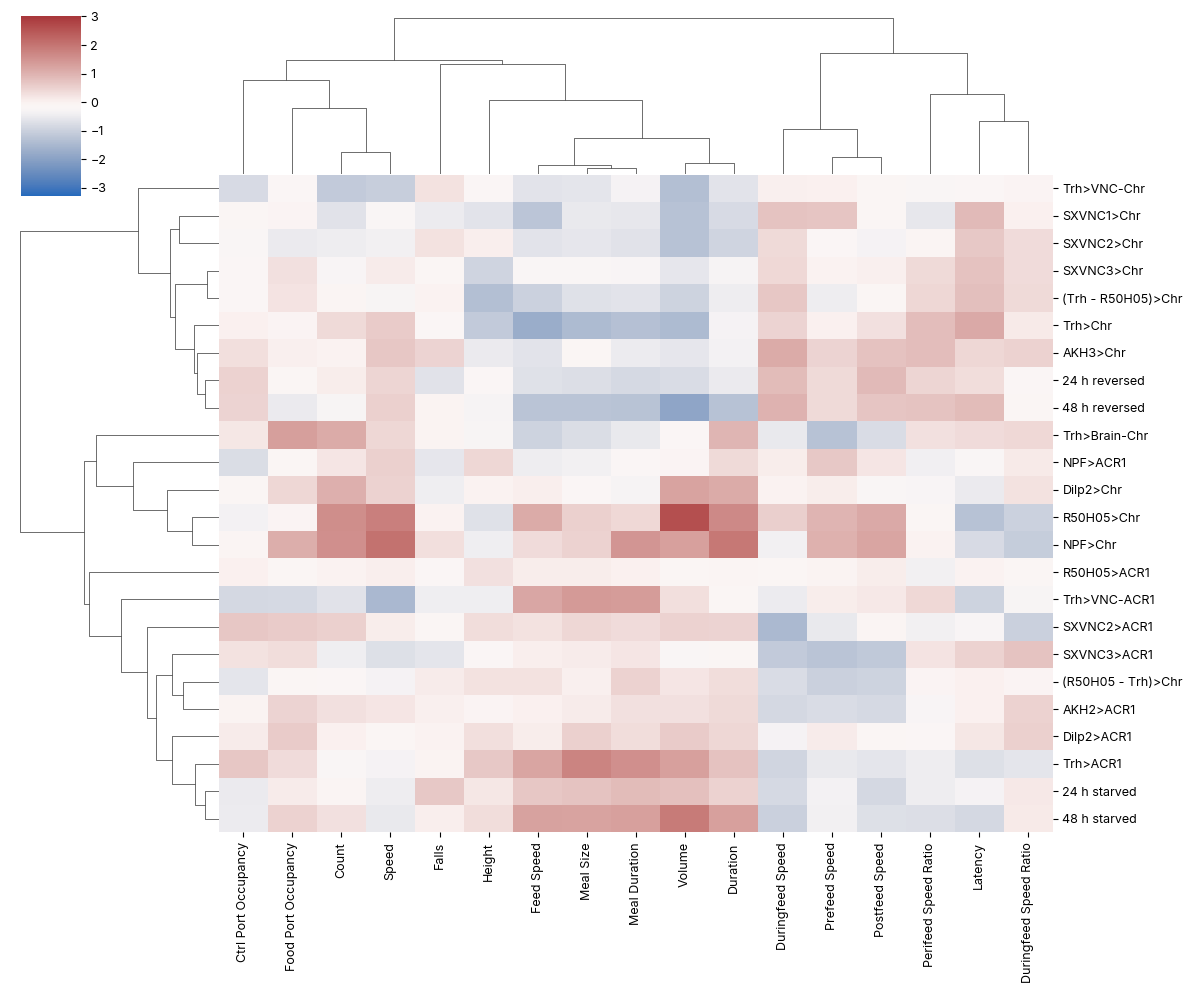

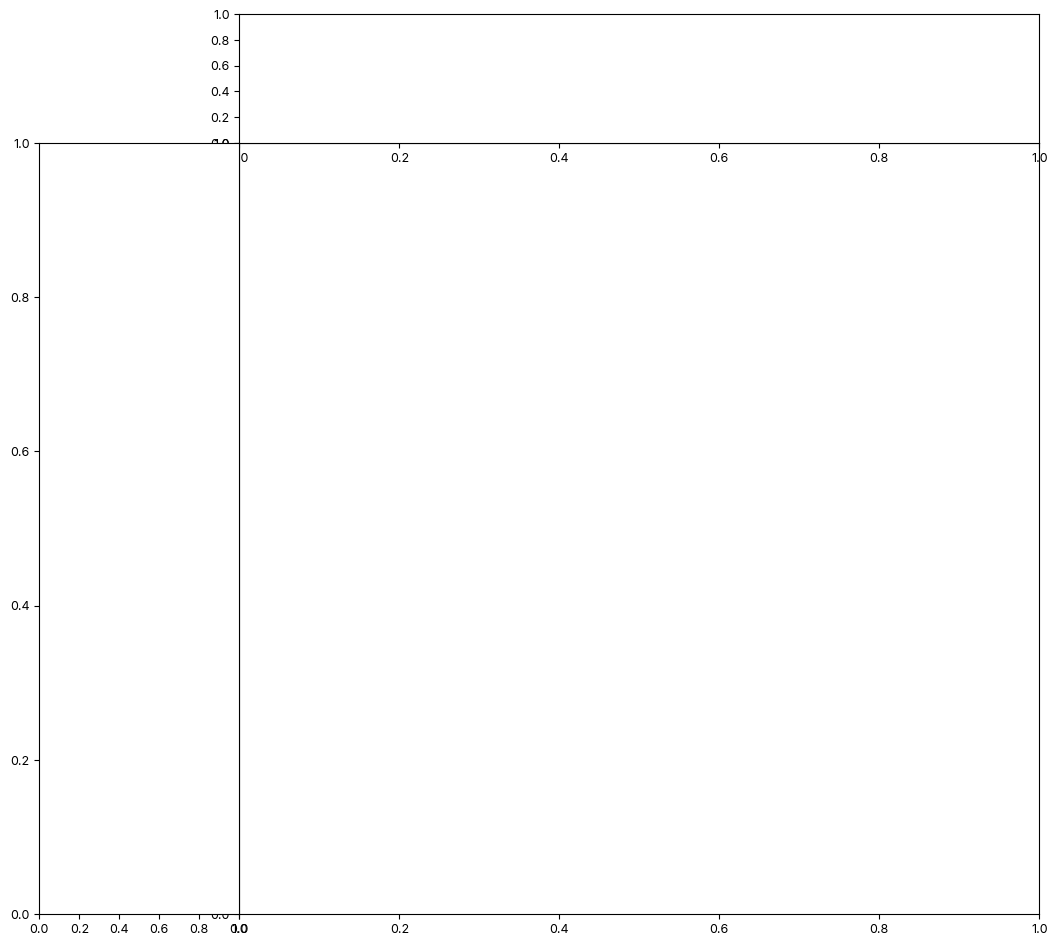

Text(1, 10.5, 'Trh>VNC-Chr')
Text(1, 31.5, 'SXVNC1>Chr')
Text(1, 52.5, 'SXVNC2>Chr')
Text(1, 73.5, 'SXVNC3>Chr')
Text(1, 94.5, '(Trh - R50H05)>Chr')
Text(1, 115.5, 'Trh>Chr')
Text(1, 136.5, 'AKH3>Chr')
Text(1, 157.5, '24 h reversed')
Text(1, 178.5, '48 h reversed')
Text(1, 199.5, 'Trh>Brain-Chr')
Text(1, 220.5, 'NPF>ACR1')
Text(1, 241.5, 'Dilp2>Chr')
Text(1, 262.5, 'R50H05>Chr')
Text(1, 283.5, 'NPF>Chr')
Text(1, 304.5, 'R50H05>ACR1')
Text(1, 325.5, 'Trh>VNC-ACR1')
Text(1, 346.5, 'SXVNC2>ACR1')
Text(1, 367.5, 'SXVNC3>ACR1')
Text(1, 388.5, '(R50H05 - Trh)>Chr')
Text(1, 409.5, 'AKH2>ACR1')
Text(1, 430.5, 'Dilp2>ACR1')
Text(1, 451.5, 'Trh>ACR1')
Text(1, 472.5, '24 h starved')
Text(1, 493.5, '48 h starved')


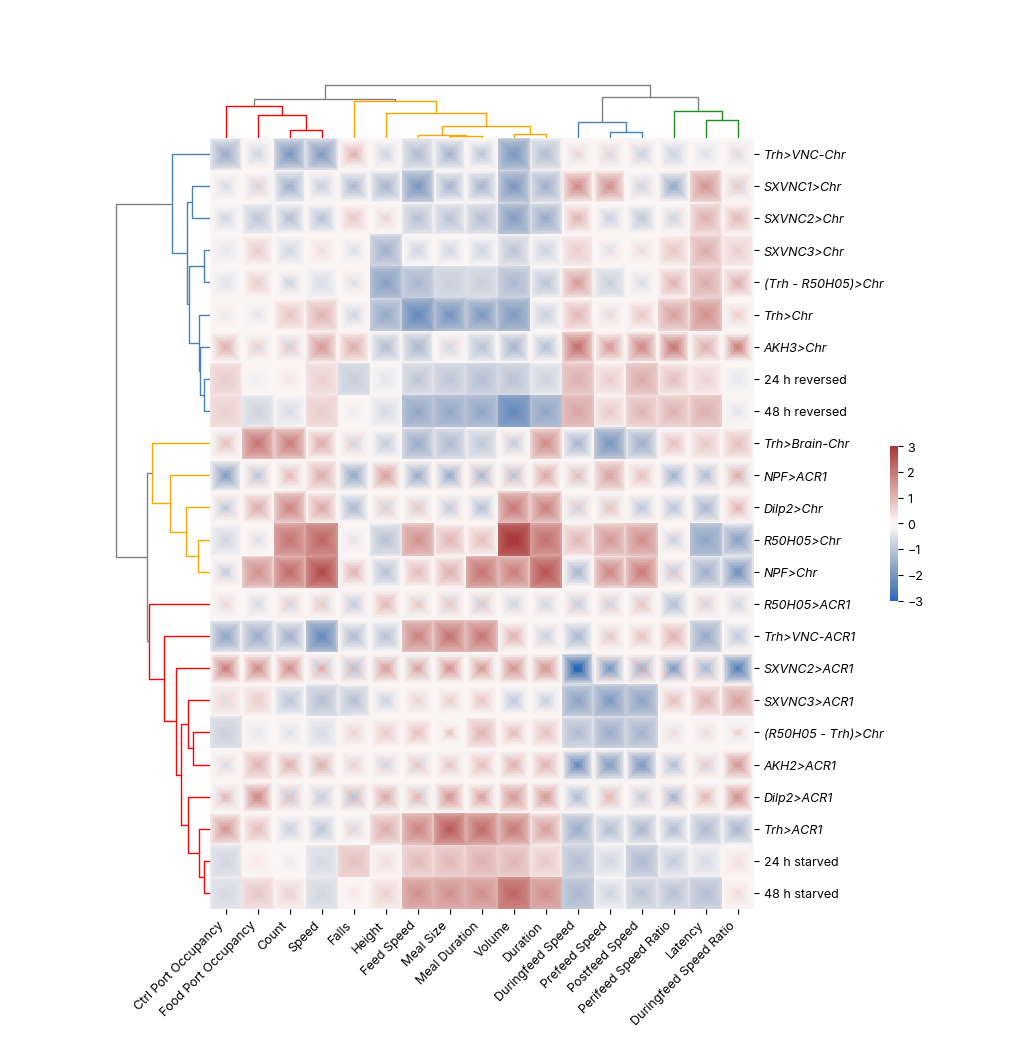

<Figure size 640x480 with 0 Axes>

In [ ]:
from scipy.cluster import hierarchy

fclu = sns.clustermap(gDf, cmap='vlag',
               method = 'average',
               metric = 'correlation', 
               figsize=(12, 10), vmin=3, vmax=-3)
newind = fclu.dendrogram_row.reordered_ind
contrasts_new = [contrasts[i] for i in newind]
delta_types_new =  [deltaType[i] for i in newind]
expt_new = [expt[i] for i in newind]

Zy = hierarchy.linkage(gDf, method = 'average', metric = 'correlation');
Zx = hierarchy.linkage(gDf.T, method = 'average',  metric = 'correlation');
# Zy_ = [Zy[len(Zy)-i-1] for i in range(len(Zy))]
f = plt.figure(figsize=(10, 9));
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = f.add_gridspec(2, 2,  width_ratios=(1, 4), height_ratios=(1, 6),
                      left=0, right=1, bottom=0, top=1,
                      wspace=0, hspace=0);
# Create the Axes.
ax = f.add_subplot(gs[1, 1]);
ax_denx = f.add_subplot(gs[0, 1]);
ax_deny = f.add_subplot(gs[1, 0]);

%run spiral_heatmap.ipynb

sp, mean = spiral_heatmap(contrasts_new, 21, expt_new, 
                         vectorselection, sort_by = fclu.dendrogram_col.reordered_ind, 
                                            reverse_neg = False,   abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types_new, ax =ax,);


plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
hierarchy.set_link_color_palette(['red', 'orange',  'steelblue', 'forestgreen'])
with plt.rc_context({'lines.linewidth': 1}):
    dn = hierarchy.dendrogram(Zx, ax = ax_denx,above_threshold_color='gray',color_threshold=.88,
                               );
    dn = hierarchy.dendrogram(Zy, ax = ax_deny, above_threshold_color='gray',color_threshold=.94, orientation = 'left',distance_sort='descending'
                              );
ax_denx.set_ylim(0, 3)
ax_denx.set_xlim(0, 250)
ax_denx.set_yticks([])
ax_denx.set_xticks([])
ax_denx.set_frame_on(False) 
ax_deny.set_ylim(0, 10*len(newind))
ax_deny.set_xlim(3,0)
ax_deny.set_yticks([])
ax_deny.set_xticks([])
ax_deny.set_frame_on(False) 
# ax.set_aspect('equal')
ax.yaxis.tick_right()
ax.set_yticklabels(ax.get_yticklabels(), ha = 'left')
xtl = ax.get_yticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
f.subplots_adjust(hspace=0)
f

'Trh>VNC-Chr'

In [ ]:
f_correlation = f
f_correlation
f_correlation.savefig(figurepath+"/ClusterCorrelation.svg", bbox_inches = 'tight')
f_correlation.savefig(figurepath+"/ClusterCorrelation.png", bbox_inches = 'tight', dpi = 300)

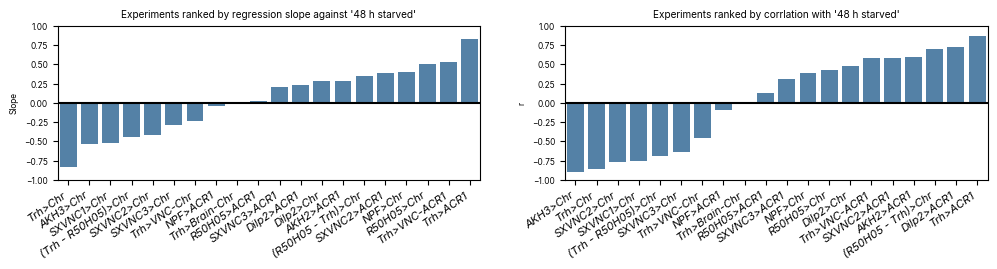

In [ ]:
setFont('inter', 6)
gDfdrop = gDf.drop(index = ['24 h starved', '24 h reversed', '48 h starved', '48 h reversed'])
statsDf = pd.DataFrame(data = [], index = gDfdrop.index, columns = ['Slope', 'Intercept', 'r', 'p', 'std_err'])
import scipy
for i in gDfdrop.index:
    statsDf.loc[i, ['Slope', 'Intercept', 'r', 'p', 'std_err']] = scipy.stats.linregress(gDf.loc['48 h starved'], gDfdrop.loc[i])
f, axes = plt.subplots(1, 2)
f.set_size_inches(12, 2)
# sns.heatmap(corr_red, center=0, vmin = -1, vmax = 1, cmap = 'vlag',
#             square=True, linewidths=.5, cbar_kws={"shrink": .4,}, ax = ax)

sns.barplot(x = statsDf.sort_values(by = 'Slope', ascending = True,).index, y = statsDf.sort_values(by = 'Slope')['Slope'], ax = axes[0], color = 'steelblue')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize = 8, rotation = 35, ha = 'right')
axes[0].plot([-.5,19.5], [0, 0], 'k')
axes[0].set_xlim([-.5,19.5])
axes[0].set_ylim([-1,1])
axes[0].set_ylabel('Slope')
xtl = axes[0].get_xticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
axes[0].set_title('Experiments ranked by regression slope against \'48 h starved\'')

sns.barplot(x = statsDf.sort_values(by = 'r', ascending = True,).index, y = statsDf.sort_values(by = 'r')['r'], ax = axes[1], color = 'steelblue')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize = 8 ,rotation = 35, ha = 'right')
axes[1].plot([-.5,19.5], [0, 0], 'k')
axes[1].set_xlim([-.5,19.5])
axes[1].set_ylim([-1,1])
axes[1].set_ylabel('r')
xtl = axes[1].get_xticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
axes[1].set_title('Experiments ranked by corrlation with \'48 h starved\'')

f.savefig(figurepath+"/corrMatrix.svg")

In [ ]:
statsDf.sort_values(by = 'r')['r']

,Slope,Intercept,r,p,std_err
Trh>CsCh,0.829666,-0.043259,0.855661,0.000012,0.129568
R50H05>CsCh,-0.502488,0.414337,-0.426451,0.087821,0.275185
Trh>ACR1,-0.824791,0.051128,-0.862873,0.000008,0.12474
R50H05>ACR1,-0.019558,-0.035637,-0.125328,0.631741,0.039976
Trh>VNC-CsCh,0.228848,-0.371754,0.456482,0.065495,0.115169
Trh>VNC-ACR1,-0.529098,-0.209257,-0.579861,0.014692,0.191943
SXVNC1>CsCh,0.521427,-0.178329,0.758303,0.000419,0.115741
SXVNC2>CsCh,0.421512,-0.175721,0.767462,0.000323,0.090914
SXVNC3>CsCh,0.282482,0.016059,0.635735,0.00609,0.088559
SXVNC2>ACR1,-0.384739,-0.060846,-0.585644,0.013507,0.137492


<AxesSubplot: xlabel='48 hr reversed', ylabel='Trh>CsCh'>

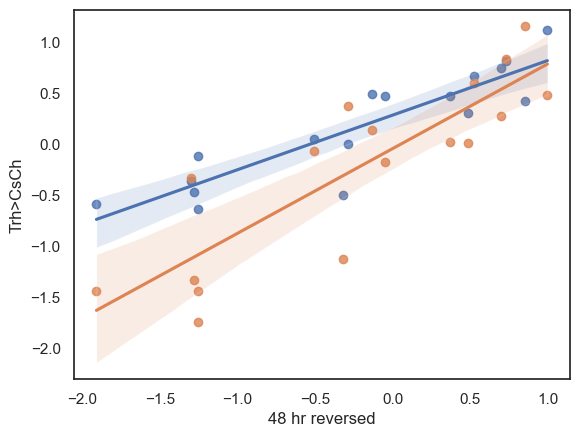

In [ ]:
sns.regplot( x = gDf.loc['48 hr reversed'], y = gDfdrop.loc['AKH3>CsCh'])
sns.regplot( x = gDf.loc['48 hr reversed'], y = gDfdrop.loc['Trh>CsCh'])


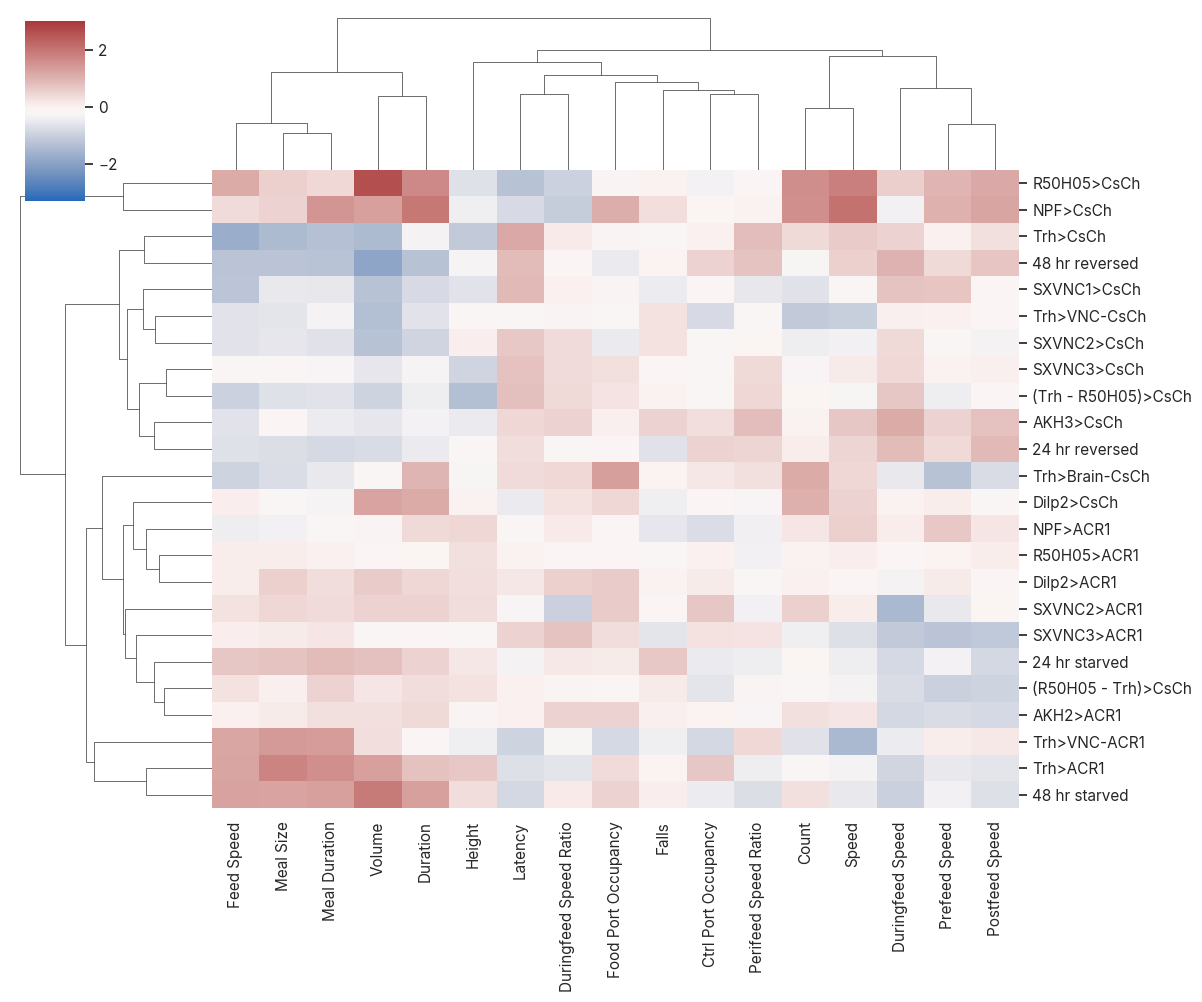

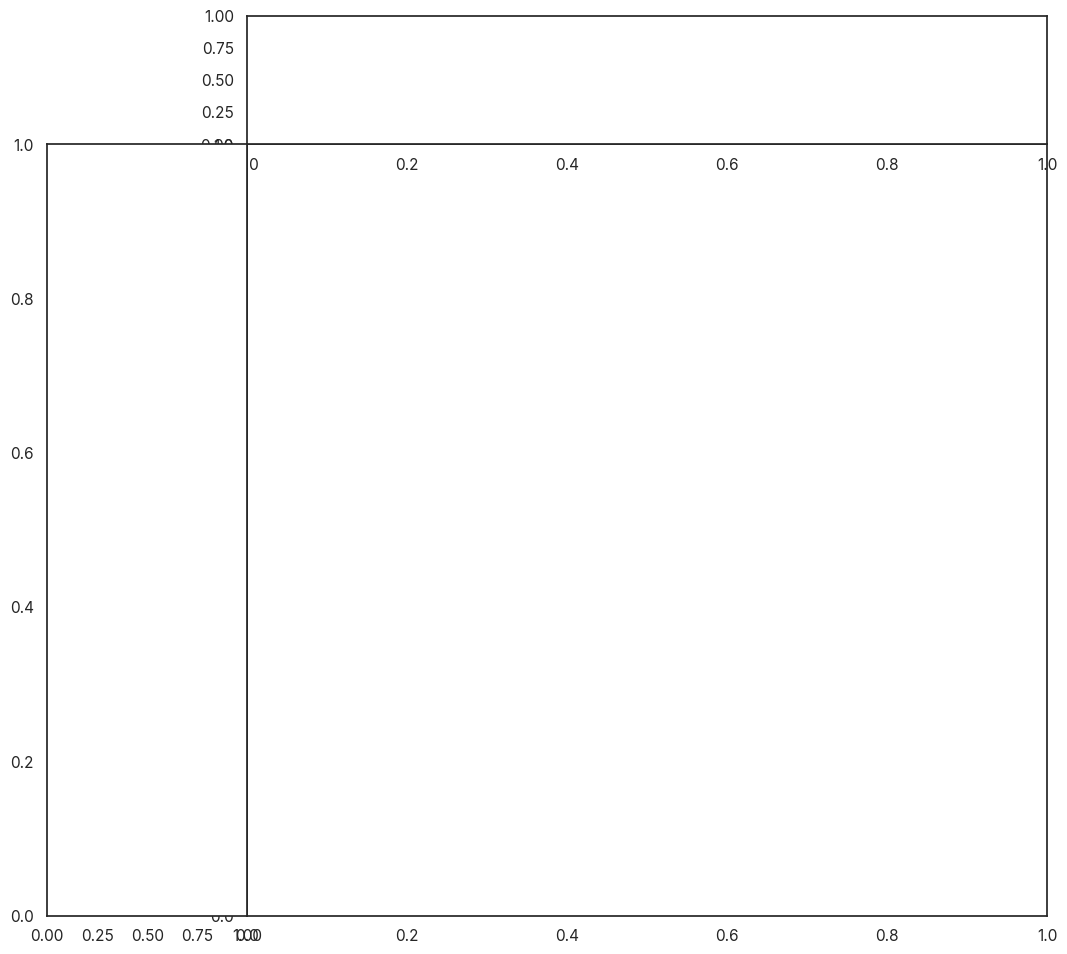

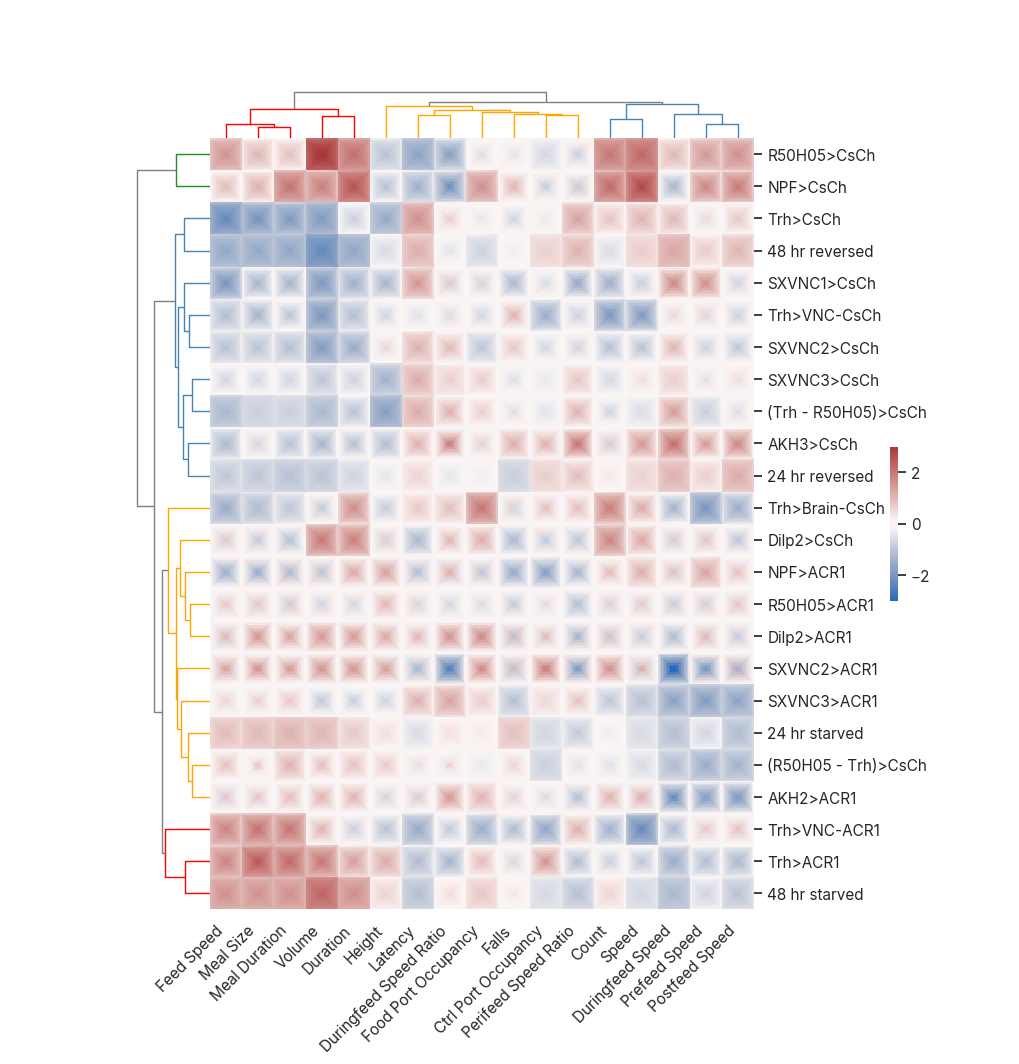

<Figure size 640x480 with 0 Axes>

In [ ]:

fclu = sns.clustermap(gDf, cmap='vlag',
               method = 'average',
               metric = 'euclidean', 
               figsize=(12, 10), vmin=3, vmax=-3)
newind = fclu.dendrogram_row.reordered_ind
contrasts_new = [contrasts[i] for i in newind]
delta_types_new =  [deltaType[i] for i in newind]
expt_new = [expt[i] for i in newind]

Zy = hierarchy.linkage(gDf, method = 'average', metric = 'euclidean');
Zx = hierarchy.linkage(gDf.T, method = 'average',  metric = 'euclidean');
# Zy_ = [Zy[len(Zy)-i-1] for i in range(len(Zy))]
f = plt.figure(figsize=(10, 9));
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = f.add_gridspec(2, 2,  width_ratios=(1, 4), height_ratios=(1, 6),
                      left=0, right=1, bottom=0, top=1,
                      wspace=0, hspace=0);
# Create the Axes.
ax = f.add_subplot(gs[1, 1]);
ax_denx = f.add_subplot(gs[0, 1]);
ax_deny = f.add_subplot(gs[1, 0]);

%run spiral_heatmap.ipynb

sp, mean = spiral_heatmap(contrasts_new, 21, expt_new, 
                         vectorselection, sort_by = fclu.dendrogram_col.reordered_ind, 
                                            reverse_neg = False,   abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types_new, ax =ax,);


plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
hierarchy.set_link_color_palette(['red', 'orange',  'steelblue', 'forestgreen'])
with plt.rc_context({'lines.linewidth': 1}):
    dn = hierarchy.dendrogram(Zx, ax = ax_denx,above_threshold_color='gray',color_threshold=4,
                               );
    dn = hierarchy.dendrogram(Zy, ax = ax_deny, above_threshold_color='gray',color_threshold=3.4, orientation = 'left',distance_sort='descending'
                              );
ax_denx.set_ylim(0, 15)
ax_denx.set_xlim(0, 250)
ax_denx.set_yticks([])
ax_denx.set_xticks([])
ax_denx.set_frame_on(False) 
ax_deny.set_ylim(0, 10*len(newind))
ax_deny.set_xlim(15,0)
ax_deny.set_yticks([])
ax_deny.set_xticks([])
ax_deny.set_frame_on(False) 
# ax.set_aspect('equal')
ax.yaxis.tick_right()
ax.set_yticklabels(ax.get_yticklabels(), ha = 'left')
f.subplots_adjust(hspace=0)
f

In [ ]:
f_euclidean = f
f_euclidean
f_euclidean.savefig(figurepath+"/ClusterEuclidean.svg", bbox_inches = 'tight')
f_euclidean.savefig(figurepath+"/ClusterEuclidean.png", dpi = 300, bbox_inches = 'tight')

In [ ]:
from svgutils.compose import *

Figure("18cm", "24cm", 
    Panel(SVG(figurepath + 'ClusterCorrelation.svg').scale(0.025),
    Text("a", 1.2, 1, size=0.6, font = 'inter', weight='bold') ).move(-.5, -.5),
    Panel(SVG(figurepath + 'corrMatrix.svg').scale(0.022),
    Text("b", 1.2, 0.3, size=0.6, font = 'inter', weight='bold') ).move(-.5, 19),
    ).save(figurepath+"/Figure5_Correlation.svg")



In [ ]:
Figure("18cm", "24cm", 
    Panel(SVG(figurepath + 'ClusterEuclidean.svg').scale(0.025),
    Text("a", 1.2, 1, size=0.6, font = 'inter', weight='bold') ).move(-.5, -.5),
    Panel(SVG(figurepath + 'corrMatrix.svg').scale(0.022),
    Text("b", 1.2, 0.3, size=0.6, font = 'inter', weight='bold') ).move(-.5, 19),
    ).save(figurepath+"/Figure5_Euclidean.svg")


##### 

In [ ]:
Figure("24cm", "30cm", 
    Panel(SVG(figurepath + 'ClusterEuclidean.svg').scale(0.03),
    Text("a", 0.2, 0.02, size=0.3, font = 'inter', weight='bold') ).move(1, 1),
    Panel(SVG(figurepath + 'corrMatrix.svg').scale(0.016),
    Text("b", 0.2, 0.02, size=0.3, font = 'inter', weight='bold') ).move(1, 15.5),
    ).save(figurepath+"/Figure5_Euclidean.svg")
